In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# path to the dataset
dataset_path = r"C:\Users\vishr\Desktop\infy virtual int\ai_dermal_scan\dataset"

classes = ['wrinkles', 'dark_spots', 'puffy_eyes', 'clear_skin']

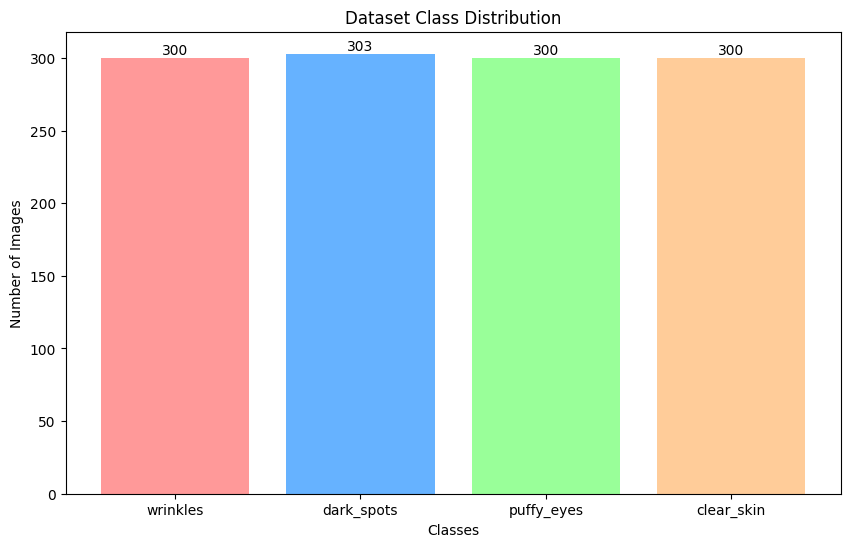

In [7]:
# Calculate the image counts 
counts = []
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    
    # Check if folder exists
    if os.path.exists(class_path):
        # Count only valid image files (jpg, png, etc.)
        file_count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        counts.append(file_count)
    else:
        print(f"Warning: Folder '{cls}' not found at {class_path}")
        counts.append(0)

#Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Add counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Dataset Class Distribution')
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# speficifying image sizes
IMG_HEIGHT = 224  # 
IMG_WIDTH = 224   # 
BATCH_SIZE = 32


In [10]:
#Define the Generator for TRAINING (With Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values 
    rotation_range=30,             # Rotation 
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,                # Zoom 
    horizontal_flip=True,          # Flip 
    fill_mode='nearest',
    validation_split=0.2           # Split: Hold back 20% for validation
)

# The Generator for Validation (Augmentation not done)
# image rescaling only
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("Data Generators created with a 20% validation split.")

Data Generators created with a 20% validation split.


In [11]:
# Load the Training Data (The 80%)
train_generator = train_datagen.flow_from_directory(
    dataset_path,                  # dataset path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',      # One-Hot Encoding 
    subset='training',             # Selecting the training subset
    shuffle=True
)

# Load the Validation Data (The 20%)
validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',      # One-Hot Encoding 
    subset='validation',           # Selecting the validation subset
    shuffle=False
)

# Verifying the classes
print(f"\nClass Mappings: {train_generator.class_indices}")

Found 963 images belonging to 4 classes.
Found 240 images belonging to 4 classes.

Class Mappings: {'clear_skin': 0, 'dark_spots': 1, 'puffy_eyes': 2, 'wrinkles': 3}


Batch Shape: (32, 224, 224, 3)


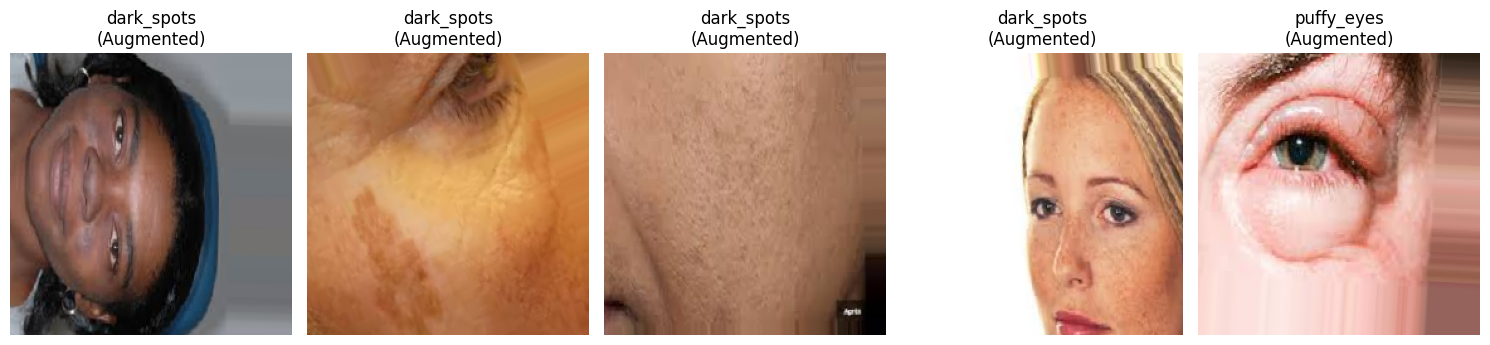

In [12]:
# Using a single batch of images for visualisation
aug_images, aug_labels = next(train_generator)

print(f"Batch Shape: {aug_images.shape}") 

# Plotting the first 5 images to verify augmentation 
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(aug_images[i])
    
    # converting the one-hot label back to a name for readability
    label_index = np.argmax(aug_labels[i])
    class_name = list(train_generator.class_indices.keys())[label_index]
    
    plt.title(f"{class_name}\n(Augmented)")
    plt.axis('off')

plt.tight_layout()
plt.show()